Ken Furudate

In [ ]:
library(reshape2)
library(ggplot2)

In [ ]:
in_f1 = "Cibersortx.txt"      

In [ ]:
set.seed(42)
data <- read.table(in_f1, header=TRUE, row.names=1, sep="\t", quote="", stringsAsFactors = FALSE)
data

,OSCC cell,CAF,MSC,MAF,Mst,DC,EC,T.cell,Mac,B.cell,Myo,LNM
N0_1,0.949462,0.037150,0.000109,0.007990,0.000031,0.000000,0.001129,0.003654,0.000000,0.000027,0.000449,0
N0_2,0.960907,0.029300,0.000000,0.003827,0.000033,0.000000,0.004337,0.001596,0.000000,0.000000,0.000000,0
N0_3,0.863627,0.065710,0.000000,0.000000,0.000000,0.000000,0.011142,0.005287,0.050508,0.000000,0.003726,0
N0_4,0.946941,0.037037,0.000000,0.000491,0.000101,0.000000,0.000206,0.004879,0.010343,0.000000,0.000000,0
N0_5,0.978963,0.015044,0.000000,0.000000,0.000000,0.000000,0.000000,0.005931,0.000000,0.000059,0.000004,0
...,...,...,...,...,...,...,...,...,...,...,...,...
LNM_111,0.916204,0.050123,0.000000,0.004877,0.000000,0.000000,0.004764,0.003464,0.001263,0.000000,0.019305,1
LNM_112,0.941422,0.021222,0.000000,0.001101,0.000039,0.001058,0.002139,0.004718,0.028281,0.000020,0.000000,1
LNM_113,0.915116,0.048471,0.000066,0.001132,0.000000,0.000000,0.001310,0.000856,0.032967,0.000000,0.000083,1
LNM_114,0.855557,0.033025,0.000000,0.013933,0.000093,0.000000,0.021723,0.002849,0.059730,0.000000,0.013091,1


In [ ]:
data.melt <- reshape2::melt(data, 
                            id.vars="LNM", 
                            value.name="Relative_fraction", 
                            na.rm=TRUE, 
                            stringsAsFactors = FALSE
                            )
data.melt$LNM <- as.character(data.melt$LNM)
head(data.melt)

  LNM  variable Relative_fraction
1   0 OSCC cell         0.9494617
2   0 OSCC cell         0.9609070
3   0 OSCC cell         0.8636268
4   0 OSCC cell         0.9469413
5   0 OSCC cell         0.9789630
6   0 OSCC cell         0.8948533


[1] "OSCC cell"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Relative_fraction by mat_$LNM
W = 5098, p-value = 0.7086
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.01478162  0.02495532
sample estimates:
difference in location 
           0.003217375 

[1] "CAF"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Relative_fraction by mat_$LNM
W = 4785, p-value = 0.6959
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.012900689  0.007322069
sample estimates:
difference in location 
          -0.002079433 

[1] "T.cell"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Relative_fraction by mat_$LNM
W = 5802.5, p-value = 0.03565
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 4.248527e-05 1.656907e-03
sample estimates:
difference in location 
          0.0008028222 



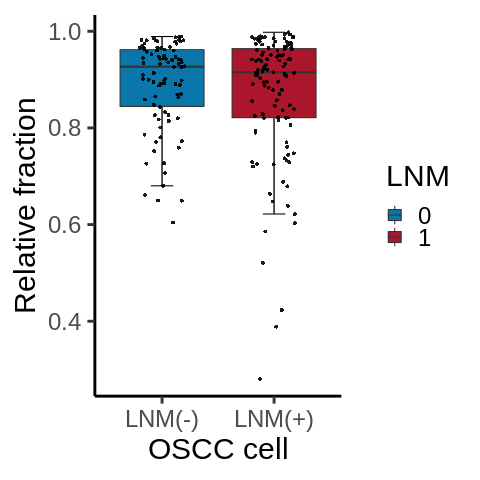

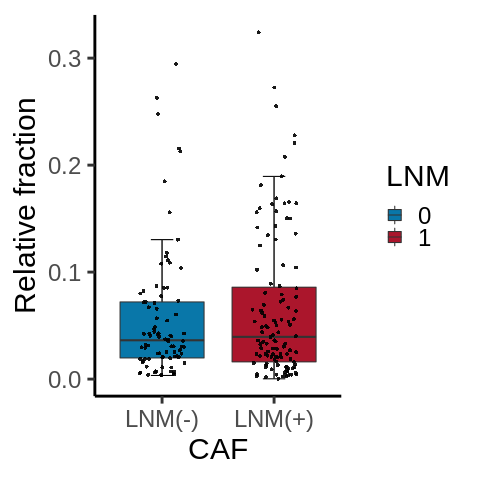

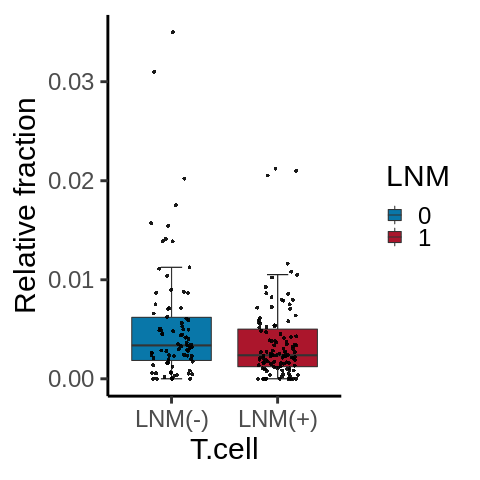

In [ ]:
anot_cols <- c("#0977a9", "#ab162c")
select.col_names <- c("OSCC cell", "CAF", "T.cell")

for (i in 1:length(select.col_names)){
	col_ <- select.col_names[i]
	print(col_)
	mat_ <- data.melt[data.melt$variable==col_,]
  ggplot()+theme_set(theme_classic(base_size = 30, base_family = "Arial"))
	p <- ggplot(mat_,
				aes(x=LNM, 
            y=Relative_fraction), 
				    fill=LNM
            ) +
        stat_boxplot(geom = "errorbar", 
                     width = 0.2
                    ) +
        geom_boxplot(aes(fill=LNM), 
                     outlier.colour=NA, alpha=1.0
                    ) +
        geom_jitter(aes(col=LNM), 
                    position=position_jitter(0.2), 
                    shape=16, 
                    alpha=0.9, 
                    color="Black"
                    ) +
		    labs(x=col_, y="Relative fraction") +
		    scale_fill_manual(values=anot_cols) +
		    scale_colour_manual(values=anot_cols) +
		    scale_x_discrete(limits=c("0", "1"),
                         labels=c("LNM(-)", "LNM(+)")
                        )
	print(p)

	res_ = wilcox.test(mat_$Relative_fraction~mat_$LNM,
					  alternative = "two.sided",
					  paired=F,
					  conf.int=T,
					  conf.level=0.95,
					  exact=F
					  )
	print(res_)
}